# Machine Learning Capstone

#### Bank Marketing Dataset

## 1. Analysis

### 1.1 Data exploration

#### 1.1.1 Data import

In [1]:
#importing data to dataframe

import pandas as pd
import csv
import numpy as np

dataset_df = pd.read_csv("dataset.csv", sep=';', engine='python')

print(dataset_df.columns.values)

pd.set_option('display.max_columns', None)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'y']


Printing first 5 rows of the data.

In [2]:
dataset_df.shape

(41188, 21)

In [3]:
dataset_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
dataset_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### 1.1.2 Descriptive analysis

Getting descriptive statistics about data.

In [5]:
dataset_df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


Visualizing of how many people subscribed to a term deposit (the dependent variable).

In [6]:
#plot percentages of people who subscribed to deposit

import matplotlib.pyplot as plt

y_df = dataset_df['y'].groupby(dataset_df['y']).count()

x_labels = ["%.2f" % (y_df.iloc[0]/dataset_df.shape[0]), "%.2f" % (y_df.iloc[1]/dataset_df.shape[0])]

ax = y_df.plot(kind='bar', figsize=(10,5), title='Credit subscriptions')

for rect, label in zip(ax.patches, x_labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

plt.show()

<Figure size 1000x500 with 1 Axes>

### Visualising distributions of numerical dependent variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1101b04a8>,
      dtype=object)

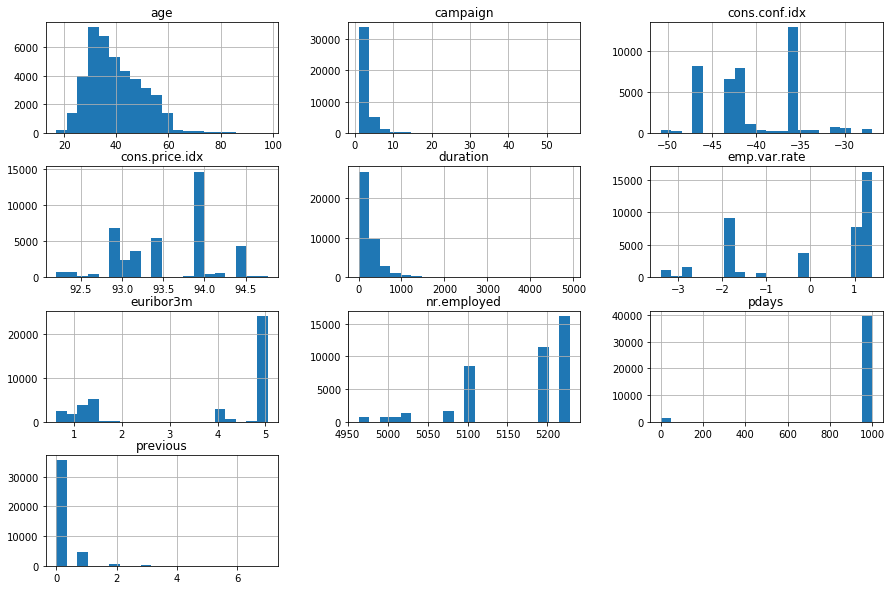

In [7]:
#distributions of numerical variables

dataset_df.hist(figsize=(15,10), bins=20)

Visualising non numerical features.

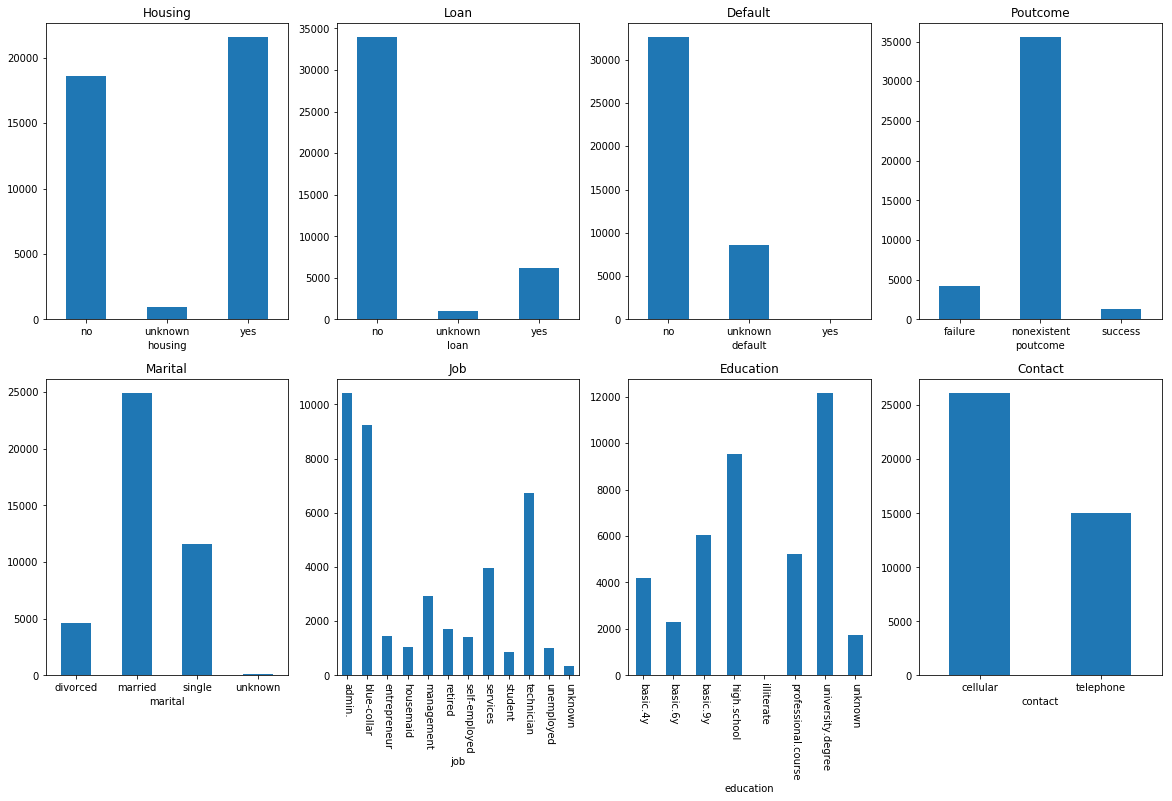

In [8]:
#distributions of categorical variables

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,12))

housing_df = dataset_df['housing'].groupby(dataset_df['housing']).count()
loan_df = dataset_df['loan'].groupby(dataset_df['loan']).count()
default_df = dataset_df['default'].groupby(dataset_df['default']).count()
poutcome_df = dataset_df['poutcome'].groupby(dataset_df['poutcome']).count()
marital_df = dataset_df['marital'].groupby(dataset_df['marital']).count()
job_df = dataset_df['job'].groupby(dataset_df['job']).count()
education_df = dataset_df['education'].groupby(dataset_df['education']).count()
contact_df = dataset_df['contact'].groupby(dataset_df['contact']).count()

housing_df.plot(ax=axes[0,0], kind='bar', title = 'Housing', rot=0)
loan_df.plot(ax=axes[0,1], kind='bar', title = 'Loan', rot=0)
default_df.plot(ax=axes[0,2], kind='bar', title = 'Default', rot=0)
poutcome_df.plot(ax=axes[0,3], kind='bar', title = 'Poutcome', rot=0)
marital_df.plot(ax=axes[1,0], kind='bar', title = 'Marital', rot=0)
job_df.plot(ax=axes[1,1], kind='bar', title = 'Job', rot=270)
education_df.plot(ax=axes[1,2], kind='bar', title = 'Education', rot=270)
contact_df.plot(ax=axes[1,3], kind='bar', title = 'Contact', rot=0)

plt.subplots_adjust(wspace=None, hspace=None)
plt.show()

### 1.3 Benchmark

As a benchmark model I will assume that all clients subscribed to a product.

In [9]:
#calculating true positives and false positives
TP = y_df[1]
FP = y_df[0]

#calculating accuracy, recall and precision
accuracy = float(TP)/(float(TP)+float(FP))
recall = float(TP)/float(TP)
precision = float(TP)/(float(TP)+float(FP))

# F-score using beta = 2 
fscore = (1 + pow(2, 2)) * precision * recall / ((pow(2, 2) * precision) + recall)
#print fscore

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}, Precision: {:.4f}, Recall: {:.4f}]".format(accuracy, fscore, precision, recall))

Naive Predictor: [Accuracy score: 0.1127, F-score: 0.3883, Precision: 0.1127, Recall: 1.0000]


## 6 Transforming data

In [10]:
#creating copy of dataset

dataset_transformed_df = dataset_df.copy()

### 6.1Transforming skewed distributions to normal distributions.

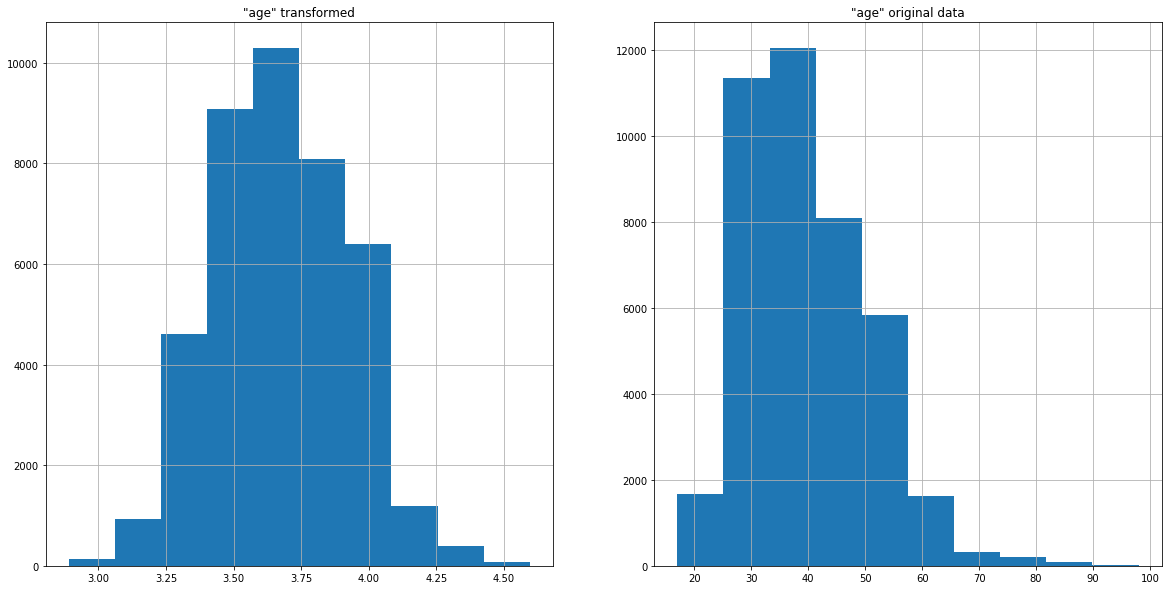

In [11]:
#log transforming age variable

dataset_transformed_df['age'] = np.log1p(dataset_transformed_df['age'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax1 = dataset_transformed_df['age'].hist(ax=axes[0])
ax1.title.set_text('"age" transformed')

ax2 = dataset_df['age'].hist(ax=axes[1])
ax2.title.set_text('"age" original data')

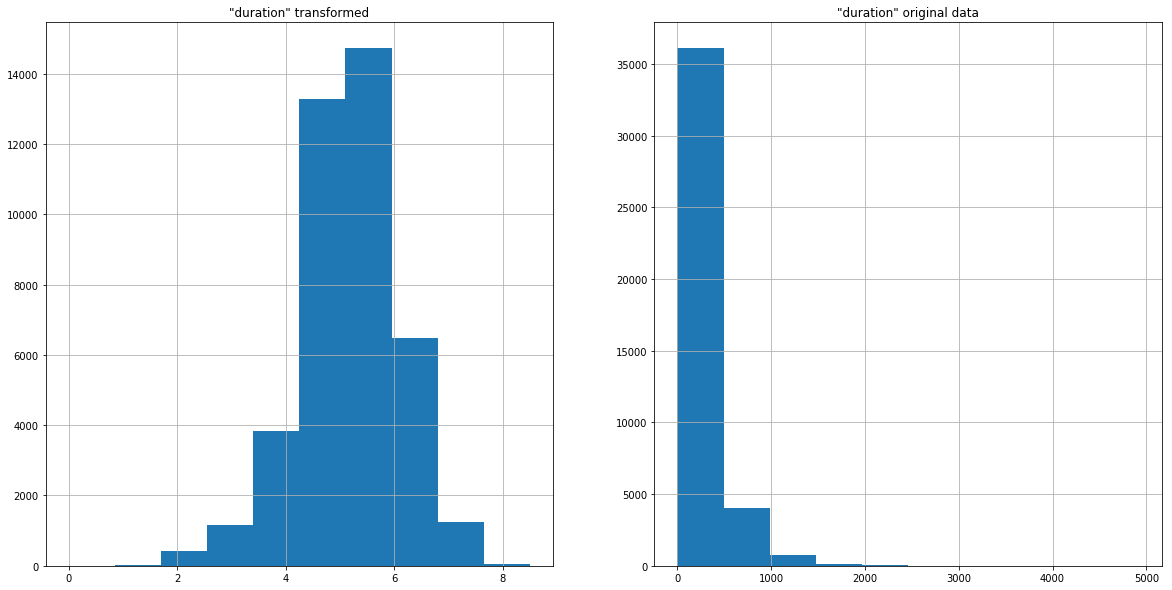

In [12]:
#log transforming duration variable

dataset_transformed_df['duration'] = np.log1p(dataset_transformed_df['duration'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax1 = dataset_transformed_df['duration'].hist(ax=axes[0])
ax1.title.set_text('"duration" transformed')
ax2 = dataset_df['duration'].hist(ax=axes[1])
ax2.title.set_text('"duration" original data')

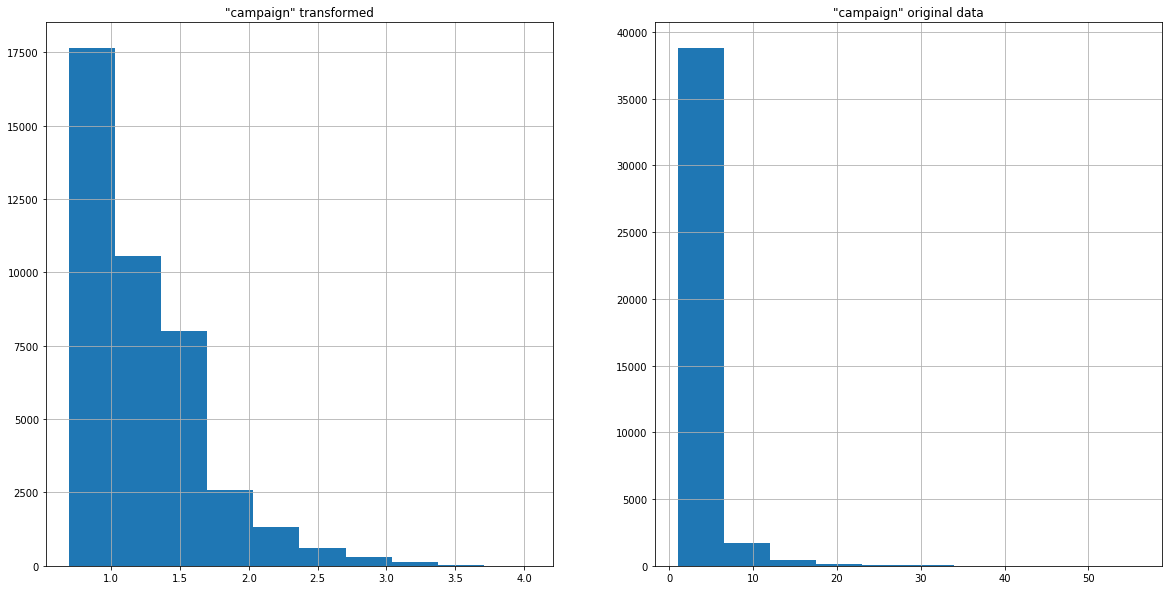

In [13]:
#log transforming campaign variable

dataset_transformed_df['campaign'] = np.log1p(dataset_transformed_df['campaign'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax1 = dataset_transformed_df['campaign'].hist(ax=axes[0])
ax1.title.set_text('"campaign" transformed')
ax2 = dataset_df['campaign'].hist(ax=axes[1])
ax2.title.set_text('"campaign" original data')

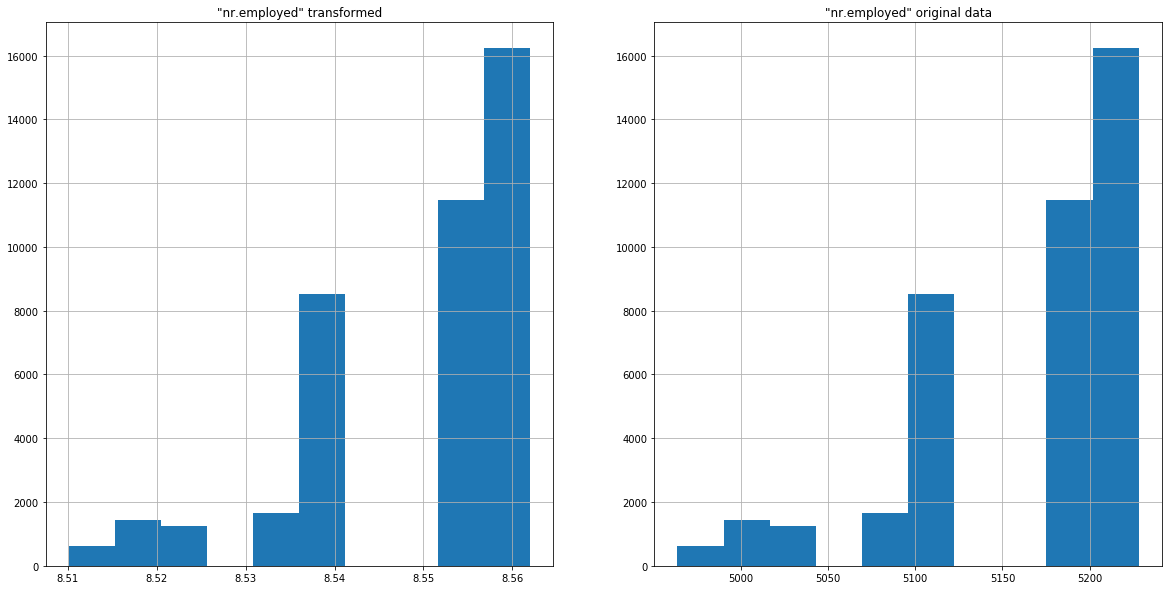

In [14]:
#log transforming nr.employed variable


dataset_transformed_df['nr.employed'] = np.log1p(dataset_transformed_df['nr.employed'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax1 = dataset_transformed_df['nr.employed'].hist(ax=axes[0])
ax1.title.set_text('"nr.employed" transformed')
ax2 = dataset_df['nr.employed'].hist(ax=axes[1])
ax2.title.set_text('"nr.employed" original data')

Transforming 'y' column (dependent variable) to numerical, where yes = 1 and no = 0.

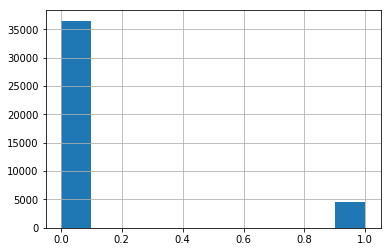

In [15]:
#mapping yes to 1 and no to 0 in dependent variable

dataset_transformed_df['y'] = dataset_transformed_df['y'].map({'yes': 1, 'no': 0})

dataset_transformed_df['y'].hist()

### 6.2 Missing data

There are no classical missing data in this set. However, there are other yes/no features in this dataset: 'housing', 'loan', 'default', 'poutcome', which besides 'yes' and 'no' have 'unknown', what is actually missing data. Because algorithms I will use do not have missing features handling and there are to many rows with missing features, I will test two types of handling.

First would be assigning numerical values to the variables as following:
- yes / success = 1
- no / failure = -1
- unknown = 0

As I plan to scale features to be in [-1,1], I think it would be the best solution.

Second approach would be to use dummies in order to create new features for every of the variables. It will grow the number of features by 8. It isn't huge number and I am curious if it will have effect on classifier performance.

In [16]:
# mapping categorical yes/no data:
#     yes / success = 1
#     no / failure = -1
#     unknown = 0


dataset_transformed_df['housing'] = dataset_transformed_df['housing'].map({'yes': 1, 'no': -1, 'unknown': 0})
dataset_transformed_df['loan'] = dataset_transformed_df['loan'].map({'yes': 1, 'no': -1, 'unknown': 0})
dataset_transformed_df['default'] = dataset_transformed_df['default'].map({'yes': 1, 'no': -1, 'unknown': 0})
dataset_transformed_df['poutcome'] = dataset_transformed_df['poutcome'].map({'success': 1, 'failure': -1, 'nonexistent': 0})

In [17]:
dataset_transformed_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4.043051,housemaid,married,basic.4y,-1,-1,-1,telephone,may,mon,5.568345,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0
1,4.060443,services,married,high.school,0,-1,-1,telephone,may,mon,5.010635,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0
2,3.637586,services,married,high.school,-1,1,-1,telephone,may,mon,5.424950,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0
3,3.713572,admin.,married,basic.6y,-1,-1,-1,telephone,may,mon,5.023881,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0
4,4.043051,services,married,high.school,-1,-1,1,telephone,may,mon,5.730100,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0


### 6.3 Inserting dummies

In [18]:
#inserting dummies for categorical variables

dummies = pd.get_dummies(dataset_transformed_df[['job', 'marital', 'education', 'contact', 'month', 'day_of_week']])

dataset_transformed_df = dataset_transformed_df.join(dummies)

dataset_transformed_df = dataset_transformed_df.drop(['job', 'marital', 'education', 'contact', 'month', 'day_of_week'], axis=1)

dataset_transformed_df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,4.043051,-1,-1,-1,5.568345,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,4.060443,0,-1,-1,5.010635,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,3.637586,-1,1,-1,5.424950,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,3.713572,-1,-1,-1,5.023881,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,4.043051,-1,-1,1,5.730100,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


## 7 Model selection

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score

# function which fits classifier to data, predicts and computes evaluation metrics

def fit_predict_measure(classifier, X_train, X_test, Y_train, Y_test):
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    
    results = {'fbeta': [fbeta_score(Y_test, Y_pred, beta=2)],
               'precision': [precision_score(Y_test, Y_pred)],
               'recall': [recall_score(Y_test, Y_pred)],
               'accuracy': [accuracy_score(Y_test, Y_pred)]
              }
    
    results_df = pd.DataFrame(results)
    
    return results_df

In [20]:
#testing five algorithms

from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

#creating 10 shuffle splits
rs = ShuffleSplit(n_splits=10, test_size=.25, random_state=42)

print("Multiple shuffle splits")

#creating results dataframes for each calssifier
results_LR = pd.DataFrame()
results_RF = pd.DataFrame()
results_GNB = pd.DataFrame()
results_SVC = pd.DataFrame()
results_DT = pd.DataFrame()

i = 2

z = 0

#iterating over random seed for under sampling

while i < 100:

    dataset_final_df = dataset_transformed_df.drop((dataset_transformed_df[dataset_transformed_df.y == 0]).sample(frac=.7, random_state=i).index, inplace = False).copy()

    dataset_final_df.reset_index(drop=True, inplace=True)

    Y = dataset_final_df['y']

    X = dataset_final_df.drop(['y'], axis=1)

    for train_index, test_index in rs.split(dataset_final_df):

        Y_train = Y[train_index]
        Y_test = Y[test_index]
        X_train = X.loc[train_index]
        X_test = X.loc[test_index]

        #Initialize models
        clf_LR = LogisticRegression(random_state=0)
        clf_RF = RandomForestClassifier(random_state=0)
        clf_GNB = GaussianNB()
        clf_SVC = svm.SVC()
        clf_DT = DecisionTreeClassifier(random_state=0)
        
        #save evaluation metrics for every run to dataframe

        if results_LR.empty:
            results_LR = fit_predict_measure(clf_LR, X_train, X_test, Y_train, Y_test)
        else:
            results_LR = results_LR.append(fit_predict_measure(clf_LR, X_train, X_test, Y_train, Y_test))

        if results_RF.empty:
            results_RF = fit_predict_measure(clf_RF, X_train, X_test, Y_train, Y_test)
        else:
            results_RF = results_RF.append(fit_predict_measure(clf_RF, X_train, X_test, Y_train, Y_test))


        if results_GNB.empty:
            results_GNB = fit_predict_measure(clf_GNB, X_train, X_test, Y_train, Y_test)
        else:
            results_GNB = results_GNB.append(fit_predict_measure(clf_GNB, X_train, X_test, Y_train, Y_test))


        if results_SVC.empty:
            results_SVC = fit_predict_measure(clf_SVC, X_train, X_test, Y_train, Y_test)
        else:
            results_SVC = results_SVC.append(fit_predict_measure(clf_SVC, X_train, X_test, Y_train, Y_test))

        if results_DT.empty:
            results_DT = fit_predict_measure(clf_DT, X_train, X_test, Y_train, Y_test)
        else:
            results_DT = results_DT.append(fit_predict_measure(clf_DT, X_train, X_test, Y_train, Y_test))
            
        z += 1

    i += 10
            
print(str(z) + " Fitting and predicting done")

Multiple shuffle splits
100 Fitting and predicting done


(0, 1)

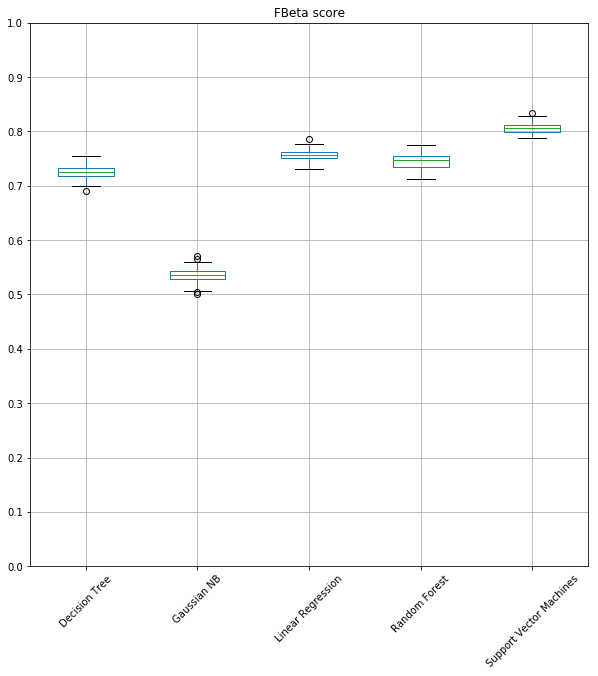

In [21]:
fbeta_df = pd.DataFrame({'Linear Regression': results_LR['fbeta'],
              'Random Forest': results_RF['fbeta'],
              'Gaussian NB': results_GNB['fbeta'],
              'Support Vector Machines': results_SVC['fbeta'],
              'Decision Tree': results_DT['fbeta'],
                        })

ax = fbeta_df.plot(kind='box', figsize=(10,10), grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], title="FBeta score", rot=45)

ax.set_ylim(0,1)

In [22]:
fbeta_df.describe()

,Decision Tree,Gaussian NB,Linear Regression,Random Forest,Support Vector Machines
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.725232,0.534845,0.756700,0.744918,0.806014
std,0.011146,0.013241,0.009718,0.013766,0.008872
min,0.690875,0.501511,0.731559,0.712914,0.787435
25%,0.718056,0.527794,0.750184,0.735161,0.798951
50%,0.725475,0.535586,0.756803,0.746424,0.805645
75%,0.733098,0.542593,0.762951,0.754303,0.811086
max,0.754668,0.569853,0.786632,0.774660,0.834462


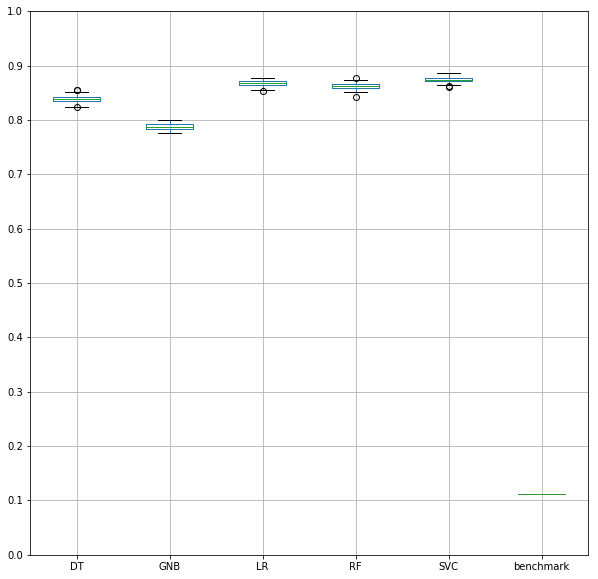

In [23]:
#box plot for accuracy score for all classifiers

accuracy_df = pd.DataFrame({'LR': results_LR['accuracy'],
              'RF': results_RF['accuracy'],
              'GNB': results_GNB['accuracy'],
              'SVC': results_SVC['accuracy'],
              'DT': results_DT['accuracy']
                           })

accuracy_df['benchmark'] = 0.1127

accuracy_df.plot(kind='box', figsize=(10,10), grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [24]:
accuracy_df.describe()

,DT,GNB,LR,RF,SVC,benchmark
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,0.838667,0.787234,0.867162,0.861858,0.874522,1.127000e-01
std,0.006092,0.005211,0.005112,0.005319,0.004977,1.394770e-17
min,0.823635,0.775186,0.853627,0.842861,0.860805,1.127000e-01
25%,0.835042,0.783902,0.864073,0.858498,0.871571,1.127000e-01
50%,0.838503,0.786721,0.867214,0.861958,0.874135,1.127000e-01
75%,0.842604,0.791592,0.870802,0.865419,0.877788,1.127000e-01
max,0.854909,0.800308,0.877724,0.876442,0.886696,1.127000e-01


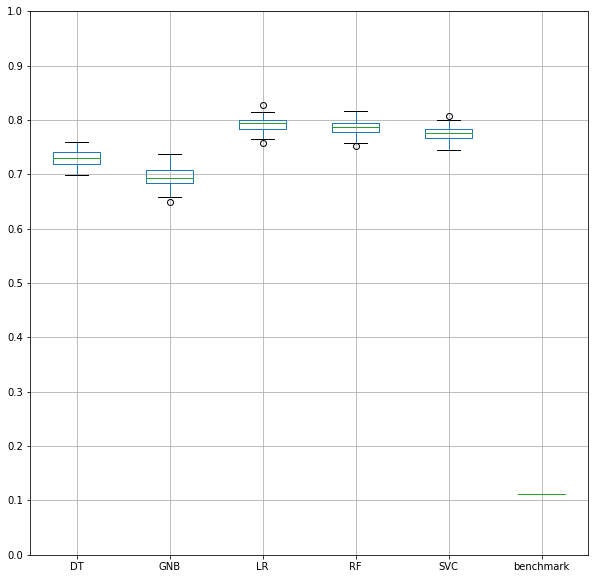

In [25]:
#box plot for precision score for all classifiers

precision_df = pd.DataFrame({'LR': results_LR['precision'],
              'RF': results_RF['precision'],
              'GNB': results_GNB['precision'],
              'SVC': results_SVC['precision'],
              'DT': results_DT['precision']
                            })

precision_df['benchmark'] = 0.1127

precision_df.plot(kind='box', figsize=(10,10), grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [26]:
precision_df.describe()

,DT,GNB,LR,RF,SVC,benchmark
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,0.730396,0.694818,0.792828,0.785677,0.774731,1.127000e-01
std,0.013591,0.016703,0.012260,0.012597,0.012252,1.394770e-17
min,0.698198,0.648924,0.758303,0.752302,0.745321,1.127000e-01
25%,0.719030,0.684862,0.784211,0.777071,0.766576,1.127000e-01
50%,0.729446,0.693937,0.793478,0.787352,0.775962,1.127000e-01
75%,0.740190,0.707032,0.800593,0.793454,0.782531,1.127000e-01
max,0.759079,0.738182,0.826579,0.817235,0.806914,1.127000e-01


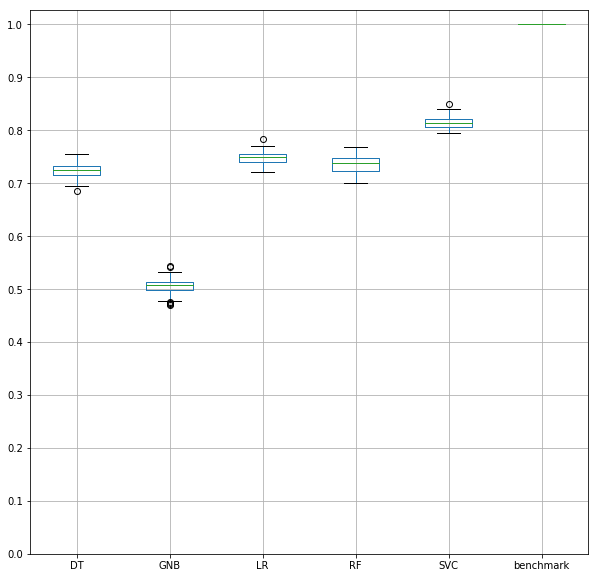

In [27]:
#box plot for recall score for all classifiers

recall_df = pd.DataFrame({'LR': results_LR['recall'],
              'RF': results_RF['recall'],
              'GNB': results_GNB['recall'],
              'SVC': results_SVC['recall'],
              'DT': results_DT['recall'],
              })

recall_df['benchmark'] = 1

recall_df.plot(kind='box', figsize=(10,10), grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [28]:
recall_df.describe()

,DT,GNB,LR,RF,SVC,benchmark
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,0.724029,0.505848,0.748237,0.735489,0.814308,1.0
std,0.012853,0.014653,0.011322,0.016581,0.010960,0.0
min,0.685201,0.469081,0.721888,0.699330,0.795068,1.0
25%,0.715036,0.498141,0.740678,0.723486,0.805980,1.0
50%,0.724375,0.508163,0.748624,0.738218,0.813472,1.0
75%,0.732437,0.513426,0.755462,0.746983,0.821446,1.0
max,0.755459,0.544314,0.783276,0.769027,0.849268,1.0


#### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

clf_SVC = svm.SVC()

results_SVC = pd.DataFrame()

rs = ShuffleSplit(n_splits=2, test_size=.25, random_state=42)

dataset_final_df = dataset_transformed_df.drop((dataset_transformed_df[dataset_transformed_df.y == 0]).sample(frac=.7, random_state=i).index, inplace = False).copy()

dataset_final_df.reset_index(drop=True, inplace=True)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]},
                    {'kernel': ['poly'], 'gamma': [1, 0.1, 0.01, 0.001], 'C': [1, 10, 100], 'degree': [2, 3, 4]
                    }]

score = 'recall'

Y = dataset_final_df['y']

X = dataset_final_df.drop(['y'], axis=1)


for train_index, test_index in rs.split(dataset_final_df):

    Y_train = Y[train_index]
    Y_test = Y[test_index]
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]

    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=3,
                       scoring=score)
    clf.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    y_true, y_pred = Y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
            
print(str(z) + " Fitting and predicting done")

# Tuning hyper-parameters for recall



In [ ]:
#training chosen classifier (SVM) with optimized hyperparameters
#same code as in [20] but for one classifier

from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

rs = ShuffleSplit(n_splits=10, test_size=.25, random_state=64)

print("Multiple shuffle splits")

results_SVC_tuned = pd.DataFrame()

i = 3

z = 0

while i < 100:

    dataset_final_df = dataset_transformed_df.drop((dataset_transformed_df[dataset_transformed_df.y == 0]).sample(frac=.7, random_state=i).index, inplace = False).copy()

    dataset_final_df.reset_index(drop=True, inplace=True)

    Y = dataset_final_df['y']

    X = dataset_final_df.drop(['y'], axis=1)

    for train_index, test_index in rs.split(dataset_final_df):

        Y_train = Y[train_index]
        Y_test = Y[test_index]
        X_train = X.loc[train_index]
        X_test = X.loc[test_index]

        #Initialize models
        clf_SVC = svm.SVC(C=1, gamma=0.1, kernel='rbf')

        if results_SVC_tuned.empty:
            results_SVC_tuned = fit_predict_measure(clf_SVC, X_train, X_test, Y_train, Y_test)
        else:
            results_SVC_tuned = results_SVC_tuned.append(fit_predict_measure(clf_SVC, X_train, X_test, Y_train, Y_test))
            
        z += 1

    i += 10
            
print(str(z) + " Fitting and predicting done")

In [ ]:
#adding benchmarks to results dataframe

results_SVC_tuned['accuracy_benchmark'] = 0.1127
results_SVC_tuned['fbeta_benchmark'] = 0.3883
results_SVC_tuned['precision_benchmark'] = 0.1127
results_SVC_tuned['recall_benchmark'] = 1

In [ ]:
#box plot for comparing results

results_SVC_tuned = results_SVC_tuned.reindex_axis(sorted(results_SVC_tuned.columns), axis=1)

results_SVC_tuned.plot(kind='box', figsize=(10,10), grid=True, yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], rot = 45, title='Final model results vs benchmark')

In [ ]:
results_SVC_tuned.describe()

In [ ]:
#getting predictions on test set

Y_pred = clf_SVC.predict(X_test)

In [ ]:
#creating visualisation for number of false positives where y='no' and false negatives where y='yes'

predicted_df = pd.DataFrame(Y_pred, columns=['Y_pred'])
Y_test.reset_index(drop=True, inplace=True)
predicted_df['Y_test'] = Y_test*2
predicted_df['diff'] = predicted_df['Y_test'] - predicted_df['Y_pred']

comparison_values_dict = {"correctly_predicted" : [predicted_df[predicted_df['diff'] == 1].count()[0] - predicted_df[predicted_df['diff'] == -1].count()[0], 
                                                   predicted_df[predicted_df['diff'] == 0].count()[0] - predicted_df[predicted_df['diff'] == 2].count()[0]],
                            "wrong_prediction": [predicted_df[predicted_df['diff'] == 2].count()[0], predicted_df[predicted_df['diff'] == -1].count()[0]]}

comparison_df = pd.DataFrame(comparison_values_dict, index=['yes', 'no'])

comparison_df.plot(kind='bar', stacked=True, title="Percentage of correctly and incorrectly predicted values", figsize=(15,10))

In [ ]:
comparison_df

In [ ]:
#calculating and visualizing percentages of missclasified points

comparison_df['percentage_incorrect'] = comparison_df['wrong_prediction']/(comparison_df['wrong_prediction']+comparison_df['correctly_predicted'])

comparison_df['percentage_incorrect'].plot(kind='bar')

In [ ]:
comparison_df